# Separation of Variable, the fourier approach
following Griffiths Introduction of electrodynamics, third edition 

Two infinite grounded metal plates lie parallel to the $xz$ plane, one at $y=0$, the other at $y=a$. The left end, at $x=0$, is closed off with an infinite strip insulated from the two plates and mantained at a specific potential $V_0(y)$. Find the potential inside this "slot".

Since the solution is independent of $z$ is is actually a 2D problem and thus:

$$\frac{\partial^2V}{\partial x^2}+\frac{\partial^2V}{\partial y^2}=0 \label{eq:1}\tag{1}$$

with the boundary conditions:

1. $V=0$ when $y=0$
2. $V=0$ when $y=a$
3. $V=V_0(y)$ when $x=0$
4. $V\rightarrow0$ as $x\rightarrow \infty$

We want to find the solutions in the form of products:

$$V(x,y)=X(x)Y(y)\tag{2}$$

Putting eq.2 into eq.1:

$$Y\frac{d^2X}{dx^2}+X\frac{d^2Y}{dy^2}$$

_Separation of variables_ by divinding by $V$:

$$\frac 1 X \frac{d^2X}{dx^2}+\frac 1 Y \frac{d^2Y}{dy^2}=0\tag{3}$$

which gives as an equation in the form:

$$f(x)+g(y)=0$$

which is only possible if f and g are both _constant_.

With that it follows for eq.3:

$$\frac 1 X \frac{d^2X}{dx^2}=C_1$$ and $$\frac 1 Y \frac{d^2Y}{dy^2}=C_2$$ with $$C_1+C_2=0$$

So either $C_1$ or $C_2$ has to be negative (or both are zero). We want $C_1$ to be positive (and thus $C_2$ negative).

So we converted a PDE into two ODEs:

$$ \frac{d^2X}{dx^2} = k^2X $$ with $k^2$ always positive, and
$$ \frac{d^2Y}{dy^2} = -k^2Y $$ with $-k^2$ always negative

Either we know the solutions for these ODEs (or look them up) or we let the computer solve them analyticly:

In [1]:
from sympy.interactive import printing # use latex for printing
printing.init_printing(use_latex=True)
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols, simplify, real_roots # import necessary methods
from sympy.abc import x,y # import variables

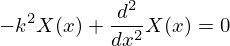

In [2]:
X = Function('X',real=True)
k = symbols('k',positive=True)
f1_ode = Eq(Derivative(X(x), x, 2) - k**2*X(x))
f1_ode

In [3]:
dsolve(f1_ode, X(x))

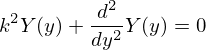

In [4]:
Y = Function('Y',real=True)
f2_ode = Eq(Derivative(Y(y), y, 2) + k**2*Y(y))
f2_ode

In [5]:
dsolve(f2_ode, Y(y))

Which gives us:
$$V(x,y)=\left (A\textrm{e}^{kx}+B\textrm{e}^{-kx}\right)\left(C\sin{ky}+D\cos{ky}\right)$$

Determine constants out of the boundary conditions:

4. $V\rightarrow0$ as $x\rightarrow \infty$

$\rightarrow A=0$

$$V(x,y)=\textrm{e}^{-kx}\left(C/B\sin{ky}+D/B\cos{ky}\right)$$
1. $V=0$ when $y=0$

$\rightarrow D/B=0$
$$V(x,y)=C/B\textrm{e}^{-kx}\sin{ky}$$

2. $V=0$ when $y=a$

$\rightarrow \sin ka=0$
$$k=\frac{n\pi}{a},\ \ (n=1,2,3,\ldots)$$

Out of:
3. $V=V_0(y)$ when $x=0$

this gives us the solution for one specific $V_0(y)\propto\sin(n\pi y/a)$

Since Laplace's equation is linear and thus:
$$\Delta V=\alpha_1\Delta V_1+\alpha_2\Delta V_2+\ldots=0\alpha_1+0\alpha_2+\ldots=0$$

We can use the the sum (which is the Fourier series) which gives us all possible solutions for an arbitrary $V_0(y)$
$$ V(x,y)=\sum^{\infty}_{n=1}C_n\textrm{e}^{-n\pi x/a}\sin(n\pi y/a)$$ and satisfies the boundary conditions.

Now we use boundary condition (3) to find the coefficients $C_n$, by multplying $V(0,y)$ by $\sin(n'\pi y/a)$ with $n'$ a positige integer and integratin from 0 to $a$: 

$$ \sum^{\infty}_{n=1}C_n\int_0^a \sin(n\pi y/a)  \sin(n'\pi y/a)\,dy = \int_0^a V_0(y) \sin(n'\pi y/a)\,dy $$

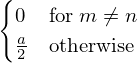

In [6]:
from sympy import integrate, pi
n, m = symbols('n m', positive = True, integer=True)
a = symbols('a', constant = True)
integrate (sin(n*pi*y/a)*sin(m*pi*y/a), (y, 0, a)) # var y, from 0 to a

and thus all terms drop out, but $n=n'$ so we get for the coefficients $C_n$:

$$ C_n = \frac 2 a \int_0^a V_0 \sin(n\pi y/a)\,dy$$

## Example $V_0$:

For the strip at $x=0$ at a constant potential $V_0$:

$$C_n=\frac{2V_0}{a}\int_0^a\sin(n\pi y/a)dy=\frac{2V_0}{n\pi}(1-\cos n\pi)=
\begin{cases}
    0, & \text{if $n$ is even}.\\
    \frac{4V_0}{n\pi}, & \text{if $n$ is odd}.
\end{cases}$$

Putting it all together:
$$ V(x,y)=\frac{4V_0}{\pi}\sum_{n=1,3,5,\ldots}\frac 1 n \textrm{e}^{-n\pi x/a}\sin(n\pi y/a)$$

### Plot for $n=1$, $a=1$, $V_0=1$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
a = 1
x = np.arange(0,1.01,0.05)  # range for x
y = np.arange(0,a+0.01,0.05)  # range for y
X,Y = np.meshgrid(x,y)  # generate 2D mesh from x and y

### Meshgrid plot

<IPython.core.display.Javascript object>


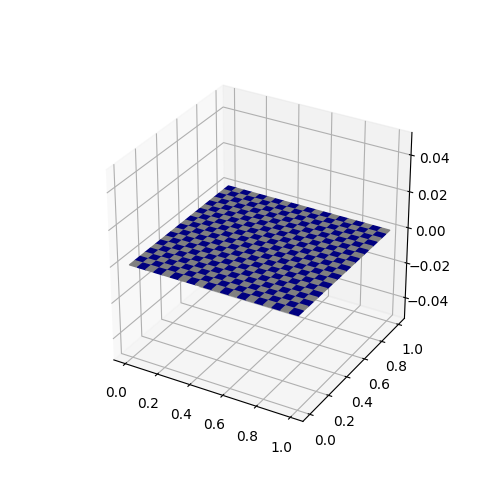

In [9]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')

# Plot the meshgrid.
colortuple = ('w', 'b') # generating checker pattern for meshgrid plot
colors = np.empty(X.shape, dtype=str)
for i in range(len(x)):
    for j in range(len(x)):
        colors[i, j] = colortuple[(i + j) % len(colortuple)]
surf = ax.plot_surface(X, Y, np.zeros(np.shape(X)), rstride=1, cstride=1, facecolors=colors) # actual plotting
plt.show()

### V(x,y) contour plot

<IPython.core.display.Javascript object>


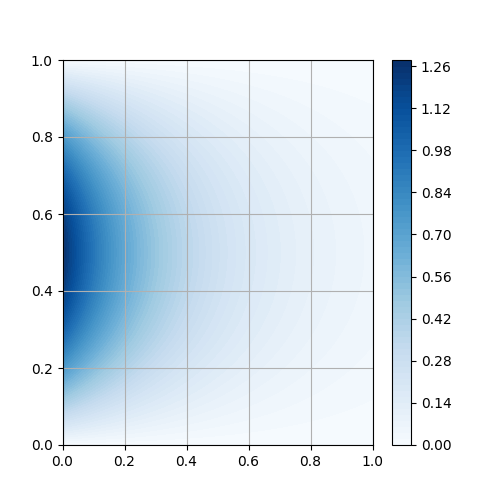

In [10]:
n=1
a=1
V0 = 1
x = np.arange(0,1.01,0.01)  # range for x
y = np.arange(0,a+0.01,0.01)  # range for y
X,Y = np.meshgrid(x,y)  # generate 2D mesh from x and y
V=(4*V0/np.pi)*(1/n*np.exp(-n*np.pi*X/a)*np.sin(n*np.pi*Y/a))  # define V(x,y) on the mesh X,Y

fig = plt.figure(figsize=(5.,5.))
ax = fig.gca()
cf = ax.contourf(X,Y,V,64,cmap='Blues')
ax.grid()
plt.colorbar(cf)

### V(x,y) surface plot

<IPython.core.display.Javascript object>


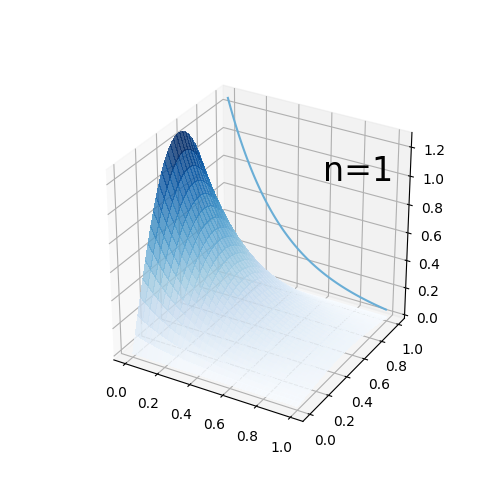

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5.,5.))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, V, cmap='Blues', alpha=0.8,
                       linewidth=0, antialiased=False)
cset = ax.contour(X, Y, V, zdir='y', offset=1, cmap='Blues',levels=1) # lineplot on the xz plane
ann = ax.text(.7,.8,1, "n={}".format(n), color='k',fontsize=24) 

### V(x,y) animation for various n

<IPython.core.display.Javascript object>


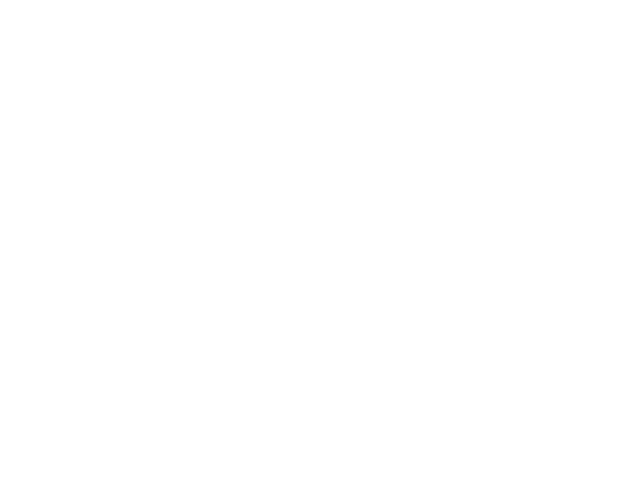

In [12]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.animation as animation

def update_plot(frame_number, zarray, cf):
    cf[0].remove() # remove plots first
    cf[1].remove()
    cf[0] = ax.plot_surface(X, Y, zarray[:,:,frame_number], cmap="Blues") # and set them excplicit again with frame number as index
    cf[1] = ax.text(.7,.8,1, "n={}".format(n_range[frame_number]), color='k',fontsize=24)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n_range = np.arange(1,28,2)
zarray = np.zeros((np.shape(X)[0], np.shape(Y)[1], len(n_range)))

V_n = lambda X,Y,n : (4*V0/np.pi)*(1/n*np.exp(-n*np.pi*X/a)*np.sin(n*np.pi*Y/a))

for i, n in enumerate(n_range):
    zarray[:,:,i] = V_n(X,Y,n)  + zarray[:,:,i-1] # summing up in adding to the last element

cf = []
cf.append(ax.plot_surface(X, Y, zarray[:,:,0], color='0.75'))
cf.append(ax.text(.7,.8,1, "n={}".format('1'), color='k',fontsize=24))

ax.set_zlim(0,1.5)
anim = animation.FuncAnimation(fig, update_plot, len(n_range), fargs=(zarray, cf),interval=400)

plt.close(anim._fig)

# Call our new function to display the animation
HTML(anim.to_html5_video())